In [ ]:
#Importing all the necessary Libraries
# Author : Pramod Kumar
# Email : pramodk211000@gmail.com
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications import resnet50, vgg16, xception, inception_resnet_v2, mobilenet_v2, densenet
from tensorflow.keras.applications import efficientnet
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Input, Lambda, Dense, Flatten
import time

from keras.models import Model
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16
import time


#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the dataset from our google drive

#unzipping the dataset in a folder 'MyDrive'

!unzip /content/drive/MyDrive/datasett.zip

Streaming output truncated to the last 5000 lines.
  inflating: datasett/Training/YES/15004_1.jpg  
  inflating: datasett/Training/YES/15005_1.jpg  
  inflating: datasett/Training/YES/15006_1.jpg  
  inflating: datasett/Training/YES/15007_1.jpg  
  inflating: datasett/Training/YES/15008_1.jpg  
  inflating: datasett/Training/YES/15009_1.jpg  
  inflating: datasett/Training/YES/15010_1.jpg  
  inflating: datasett/Training/YES/15011_1.jpg  
  inflating: datasett/Training/YES/15012_1.jpg  
  inflating: datasett/Training/YES/15013_1.jpg  
  inflating: datasett/Training/YES/15014_1.jpg  
  inflating: datasett/Training/YES/15015_1.jpg  
  inflating: datasett/Training/YES/15016_1.jpg  
  inflating: datasett/Training/YES/15017_1.jpg  
  inflating: datasett/Training/YES/15018_1.jpg  
  inflating: datasett/Training/YES/15019_1.jpg  
  inflating: datasett/Training/YES/15020_1.jpg  
  inflating: datasett/Training/YES/15021_1.jpg  
  inflating: datasett/Training/YES/15022_1.jpg  
  inflating: datas

PREPROCESSING USING IMAGE DATA GENERATOR

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/datasett/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                )

test_set = test_datagen.flow_from_directory('/content/datasett/Validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 36000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=2,
                                            verbose=1,
                                            min_lr=1e-7)

es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=4)

RESNET 50 MODEL IMPLEMENTATION

In [ ]:
#DEEP LEARNING - TRAINING

# 1) RESNET 50 IMPLEMENTATION


img_sz = [224,224]


model_ResNet50 = ResNet50(input_shape=img_sz + [3], weights='imagenet', include_top=False)
for layer in model_ResNet50.layers:
    layer.trainable = False
x = Flatten()(model_ResNet50.output)

prediction = Dense(2, activation='softmax')(x)

#Creating Model object
model_ResNet50 = Model(inputs=model_ResNet50.input, outputs=prediction)

# view the structure of the model
model_ResNet50.summary()


model_ResNet50.compile(optimizer = Adam(1e-05) ,
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

t0 = time.clock()
history = model_ResNet50.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[learning_rate_reduction,ModelCheckpoint("ResNet50.h5", monitor='val_accuracy',save_weights_only=True, mode='max', save_best_only=True, verbose=2),es]
)
t1 = time.clock() - t0
print(t1)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
1125/1125 [==============================] - ETA: 0s - loss: 0.4263 - accuracy: 0.8919
Epoch 1: val_accuracy improved from -inf to 0.92100, saving model to ResNet50.h5
1125/1125 [==============================] - 360s 318ms/step - loss: 0.4263 - accuracy: 0.8919 - val_loss: 0.3019 - val_accuracy: 0.9210 - lr: 1.0000e-05
Epoch 2/30
1125/1125 [==============================] - ETA: 0s - loss: 0.2395 - accuracy: 0.9375
Epoch 2: val_accuracy improved from 0.92100 to 0.94000, saving model to ResNet50.h5
1125/1125 [==============================] - 355s 315ms/step - loss: 0.2395 - accuracy: 0.9375 - val_loss: 0.2222 - val_accuracy: 0.9400 - lr: 1.0000e-05
Epoch 3/30
1125/1125 [==============================] - ETA: 0s - loss: 0.1844 - accuracy: 0.9460
Epoch 3: val_accuracy did not improve from 0.94000
1125/1125 [==============================] - 355s 315ms/step - loss: 0.1844 - accuracy: 0.9460 - val_loss: 0.1877 - val_accuracy: 0.9310 - lr: 1.0000e-05
Epoch 4/30
1125/1125 [======

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [ ]:
#saving the model file
model_ResNet50.save('model_resnet.h5')

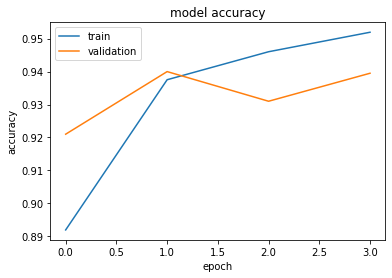

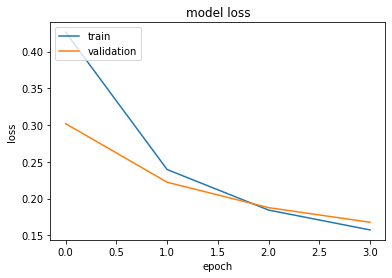

In [ ]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
!unzip /content/drive/MyDrive/RealSamplesFinal.zip

Archive:  /content/drive/MyDrive/RealSamplesFinal.zip
   creating: RealSamplesFinal/Testing/
   creating: RealSamplesFinal/Testing/NO/
  inflating: RealSamplesFinal/Testing/NO/imgn_492.jpg  
  inflating: RealSamplesFinal/Testing/NO/imgn_493.jpg  
  inflating: RealSamplesFinal/Testing/NO/imgn_494.jpg  
  inflating: RealSamplesFinal/Testing/NO/imgn_495.jpg  
  inflating: RealSamplesFinal/Testing/NO/imgn_496.jpg  
  inflating: RealSamplesFinal/Testing/NO/imgn_497.jpg  
  inflating: RealSamplesFinal/Testing/NO/imgn_498.jpg  
  inflating: RealSamplesFinal/Testing/NO/imgn_499.jpg  
  inflating: RealSamplesFinal/Testing/NO/imgn_500.jpg  
  inflating: RealSamplesFinal/Testing/NO/imgn_501.jpg  
  inflating: RealSamplesFinal/Testing/NO/imgn_502.jpg  
  inflating: RealSamplesFinal/Testing/NO/imgn_503.jpg  
  inflating: RealSamplesFinal/Testing/NO/imgn_504.jpg  
  inflating: RealSamplesFinal/Testing/NO/imgn_505.jpg  
  inflating: RealSamplesFinal/Testing/NO/imgn_506.jpg  
  inflating: RealSamplesF

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set2 = test_datagen.flow_from_directory('/content/RealSamplesFinal/Testing',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                             shuffle = False)

Found 150 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set2 = test_datagen.flow_from_directory('/content/RealSamplesFinal/Validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                             shuffle = False)

Found 150 images belonging to 2 classes.


In [ ]:
#function to evalute accuracy of a model.
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns

def evaluate_model(model, test_set):

    results = model.evaluate(test_set, verbose=0)
    loss = results[0]
    acc = results[1]

    print("    Test Loss: {:.5f}".format(loss))
    print("Test Accuracy: {:.2f}%".format(acc * 100))

In [ ]:
evaluate_model(model_ResNet50,test_set2)

    Test Loss: 0.65650
Test Accuracy: 73.33%


In [ ]:
y_pred = model_ResNet50.predict(test_set2)

In [ ]:
#Confution Matrix and Classification Report
num_of_test_samples = 2000
batch_size=32
Y_pred = model_ResNet50.predict(test_set2, num_of_test_samples // batch_size+1,verbose=True)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set2.classes, y_pred))
print('Classification Report')
target_names = ['NO', 'YES']
print(classification_report(test_set2.classes, y_pred))

5/5 [==============================] - 6s 2s/step
Confusion Matrix
[[50  0]
 [40 60]]
Classification Report
              precision    recall  f1-score   support

           0       0.56      1.00      0.71        50
           1       1.00      0.60      0.75       100

    accuracy                           0.73       150
   macro avg       0.78      0.80      0.73       150
weighted avg       0.85      0.73      0.74       150



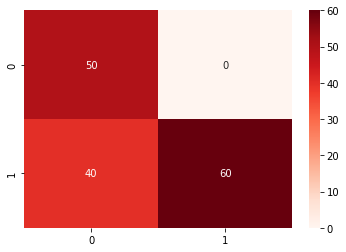

In [ ]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt



cf_matrix = confusion_matrix(test_set2.classes, y_pred)


sns.heatmap(cf_matrix, annot=True,fmt="d",cmap='Reds')



testing with random set of images


In [ ]:
from matplotlib import test
data = test_set.next()
testX = data[0]


prediction = model.predict(d2_test)
prediction = np.argmax(prediction,axis=-1)

count0 = 0
count1= 1
for i in prediction:
  if (i==1):
    count1=count1+1
  else:
    count0=count0+1
print("Number of true images (CRACK = YES): ",count1)
print("Number of false images (CRACK = NO): ",count0)

In [ ]:
#making a new directory in runtime called
!mkdir data
!cd data
!mkdir data/yes
!mkdir data/no

for i in range(len(prediction)):
  path = ''
  if(prediction[i]==1):
    path = '/content/data/yes'
  else:
    path = '/content/data/no'
  cv2.imwrite(path +"/" + str(i) +".jpg", testX[i]*255)


!cp -r "/content/data" "/content/drive/MyDrive"

VGG-16 MODEL IMPLEMENTATION

In [ ]:

img_sz = [224,224]

# model definitoin
model_vgg16 = VGG16(input_shape=img_sz + [3], weights='imagenet', include_top=False)
for layer in model_vgg16.layers:
    layer.trainable = False
x = Flatten()(model_vgg16.output)

prediction = Dense(2, activation='softmax')(x)

# create a model object
model_vgg16 = Model(inputs=model_vgg16.input, outputs=prediction)

# view the structure of the model
model_vgg16.summary()


model_vgg16.compile(optimizer = Adam(1e-05) ,
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

t0 = time.clock()
history = model_vgg16.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[learning_rate_reduction,ModelCheckpoint("vgg16.h5", monitor='val_accuracy',save_weights_only=True, mode='max', save_best_only=True, verbose=2),es]
)
t1 = time.clock() - t0
print(t1)


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
1125/1125 [==============================] - ETA: 0s - loss: 0.2319 - accuracy: 0.9430
Epoch 1: val_accuracy improved from -inf to 0.97200, saving model to vgg16.h5
1125/1125 [==============================] - 363s 322ms/step - loss: 0.2319 - accuracy: 0.9430 - val_loss: 0.1342 - val_accuracy: 0.9720 - lr: 1.0000e-05
Epoch 2/30
1125/1125 [==============================] - ETA: 0s - loss: 0.0767 - accuracy: 0.9860
Epoch 2: val_accuracy improved from 0.97200 to 0.98500, saving model to vgg16.h5
1125/1125 [==============================] - 358s 318ms/step - loss: 0.0767 - accuracy: 0.9860 - val_loss: 0.0747 - val_accuracy: 0.9850 - lr: 1.0000e-05
Epoch 3/30
1125/1125 [==============================] - ETA: 0s - loss: 0.0476 - accuracy: 0.9896
Epoch 3: val_accuracy improved from 0.98500 to 0.98850, saving model to vgg16.h5
1125/1125 [==============================] - 358s 319ms/step - loss: 0.0476 - accuracy: 0.9896 - val_loss: 0.0543 - val_accuracy: 0.9885 - lr: 1.0000e-05
Epoc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [ ]:
model_vgg16.save('model_vggt.h5')

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set2 = test_datagen.flow_from_directory('/content/RealSamplesFinal/Validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                             shuffle = False)

Found 150 images belonging to 2 classes.


In [ ]:
evaluate_model(model_vgg16, test_set2)

    Test Loss: 0.86220
Test Accuracy: 72.67%


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set2 = test_datagen.flow_from_directory('/content/datasett/Testing',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                             shuffle = False)

Found 2000 images belonging to 2 classes.


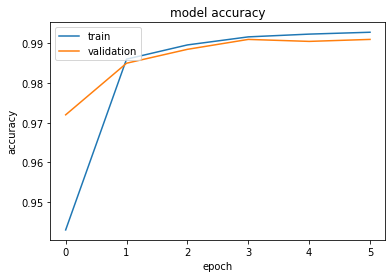

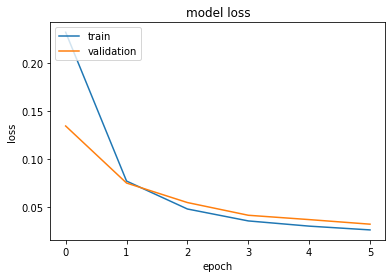

In [ ]:
# list all data in history
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns

def evaluate_model(model, test_set):

    results = model.evaluate(test_set, verbose=0)
    loss = results[0]
    acc = results[1]

    print("    Test Loss: {:.5f}".format(loss))
    print("Test Accuracy: {:.2f}%".format(acc * 100))

In [ ]:
evaluate_model(model_vgg16, test_set2)

    Test Loss: 0.02140
Test Accuracy: 99.50%


In [ ]:
#Confution Matrix and Classification Report
num_of_test_samples = 2000
batch_size=32
Y_pred = model_vgg16.predict(test_set2, num_of_test_samples // batch_size+1,verbose=True)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set2.classes, y_pred))
print('Classification Report')
target_names = ['NO', 'YES']
print(classification_report(test_set2.classes, y_pred))

63/63 [==============================] - 5s 75ms/step
Confusion Matrix
[[999   1]
 [  9 991]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1000
           1       1.00      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      0.99      0.99      2000



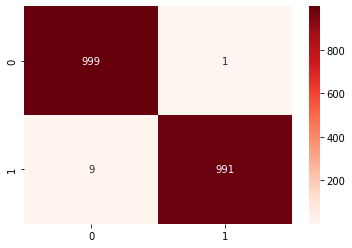

In [ ]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix


cf_matrix = confusion_matrix(test_set2.classes, y_pred)



sns.heatmap(cf_matrix, annot=True,fmt="d",cmap='Reds')

INCEPTION RESNET V2 MODEL IMPLEMENTATION

In [ ]:
from keras.models import Model
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
import time
import tensorflow as tf

In [ ]:
img_sz = [299,299]

# our layers - you can add more if you want
base_model = InceptionResNetV2(input_shape=img_sz + [3], weights='imagenet', include_top=False)
for layer in base_model.layers:
    layer.trainable = False

model_irv2 = tf.keras.Sequential([

        base_model,

        tf.keras.layers.BatchNormalization(renorm=True),

        tf.keras.layers.GlobalAveragePooling2D(),

        tf.keras.layers.Dense(512, activation='relu'),

        tf.keras.layers.Dense(256, activation='relu'),

        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(128, activation='relu'),

        tf.keras.layers.Dense(2, activation='softmax')

    ])
# create a model object
model_irv2 = Model(inputs=model_irv2.input, outputs=prediction)

# view the structure of the model
model_irv2.summary()


model_irv2.compile(optimizer = Adam(1e-05) ,
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

t0 = time.clock()
history = model_irv2.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[learning_rate_reduction,ModelCheckpoint("irv2.h5", monitor='val_accuracy',save_weights_only=True, mode='max', save_best_only=True, verbose=2),es]
)
t1 = time.clock() - t0
print(t1)


219070464/219055592 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 8, 8, 1536)       54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 8, 8, 1536)       10752     
 tchNormalization)                                               
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_4 (Dense)             (None, 512)               786944    
                                                                 
 dense_5 (Dense)             (None, 256)               

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
1125/1125 [==============================] - ETA: 0s - loss: 0.1291 - accuracy: 0.9543
Epoch 1: val_accuracy improved from -inf to 0.99400, saving model to irv2.h5
1125/1125 [==============================] - 387s 335ms/step - loss: 0.1291 - accuracy: 0.9543 - val_loss: 0.0177 - val_accuracy: 0.9940 - lr: 1.0000e-05
Epoch 2/30
1125/1125 [==============================] - ETA: 0s - loss: 0.0272 - accuracy: 0.9915
Epoch 2: val_accuracy improved from 0.99400 to 0.99550, saving model to irv2.h5
1125/1125 [==============================] - 373s 332ms/step - loss: 0.0272 - accuracy: 0.9915 - val_loss: 0.0120 - val_accuracy: 0.9955 - lr: 1.0000e-05
Epoch 3/30
1125/1125 [==============================] - ETA: 0s - loss: 0.0195 - accuracy: 0.9938
Epoch 3: val_accuracy did not improve from 0.99550
1125/1125 [==============================] - 372s 331ms/step - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0102 - val_accuracy: 0.9955 - lr: 1.0000e-05
Epoch 4/30
1125/1125 [==============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [ ]:
model_irv2.save('modelirv2.h5')

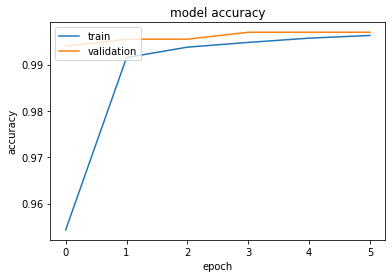

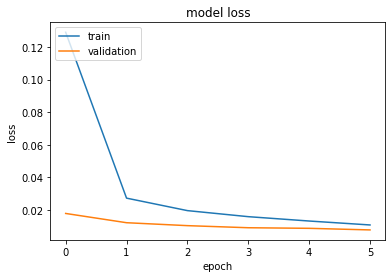

In [ ]:
# list all data in history
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
evaluate_model(model_irv2, test_set2)

    Test Loss: 0.00351
Test Accuracy: 99.95%


In [ ]:
#Confution Matrix and Classification Report
num_of_test_samples = 2000
batch_size=32
Y_pred = model_irv2.predict(test_set2, num_of_test_samples // batch_size+1,verbose=True)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set2.classes, y_pred))
print('Classification Report')
target_names = ['NO', 'YES']
print(classification_report(test_set2.classes, y_pred))

63/63 [==============================] - 9s 103ms/step
Confusion Matrix
[[ 999    1]
 [   0 1000]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



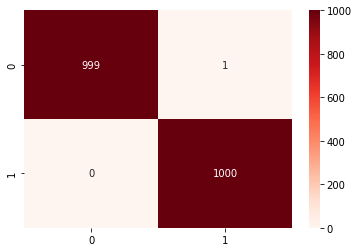

In [ ]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix


cf_matrix = confusion_matrix(test_set2.classes, y_pred)



sns.heatmap(cf_matrix, annot=True,fmt="d",cmap='Reds')

In [ ]:
#Confution Matrix and Classification Report
num_of_test_samples = 2000
batch_size=32
Y_pred = model_test.predict(test_set2, num_of_test_samples // batch_size+1,verbose=True)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set2.classes, y_pred))
print('Classification Report')
target_names = ['NO', 'YES']
print(classification_report(test_set2.classes, y_pred))



HYBRID MODEL WITH RESNET-50 AS FEATURE EXTRACTOR AND TRADITIONAL MACHINE LEARNING AS CLASSIFIER

In [ ]:
#Hybrid Model

def return_images(name):
  true = "/content/datasett/"+name+"/" + "YES"
  false = "//content/datasett/" + name + "/" + "NO"
  x = []
  y = []
  dir_list = os.listdir(true)
  for i in dir_list:
    image = cv2.imread(true + "/" + i)
    image = cv2.resize(image, (224,224), interpolation = cv2.INTER_AREA)
    x.append(image)

    y.append(1)
  dir_list = os.listdir(false)
  for i in dir_list:
    image = cv2.imread(false + "/" + i)
    image = cv2.resize(image, (224,224), interpolation = cv2.INTER_AREA)
    x.append(image)
    y.append(0)
  return np.array(x),np.array(y)

In [ ]:
import cv2
trainX,trainY = return_images('Training')
validX,validY= return_images('Validation')
testX,testY = return_images('Testing')


In [ ]:
def metrics(act,pred):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(0,len(act)):
      if act[i] == pred[i]:
        if act[i] == 1:
          TP+=1
        else :
          TN+=1
      else:
        if pred[i] == 1:
          FP+=1
        else:
          FN+=1
    accuracy = (TP+TN)/((TP+FN)+(FP+TN))
    sensitivity = TP/(TP + FN)
    specificity = (TN)/(FP+TN)
    precision = (TP)/(TP+FP)
    F1_score = (2*TP)/(2*TP+FN+FP)
    print("True Positives: ",TP)
    print("True Negatives: ",TN)
    print("False Positives: ",FP)
    print("False Negatives: ",FN)
    print("Accuracy : " + str(accuracy) + "\n" + "Sensitivity : " + str(sensitivity) + "\nSpecificity :" + str(specificity))
    print("Precision : " + str(precision) + "\n" + "F1 Score : " + str(F1_score))

In [ ]:
def resnet50_model():
  base_model = keras.applications.resnet50.ResNet50(
    include_top=False, weights='imagenet', input_shape=(224,224,3), pooling=None, classes=2
)
  model= Sequential()
  model.add(base_model)
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  for layer in model.layers:
    layer.trainable=False
  model.summary()
  return model

In [ ]:
model = resnet50_model()
features_xtrain = model.predict(trainX, batch_size = 20)
features_xtest = model.predict(testX, batch_size = 20)

94781440/94765736 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 100)               10035300  
                                                                 
Total params: 33,623,012
Trainable params: 0
Non-trainable params: 33,623,012
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


XGBoost training time:  13.274688000000424
XGBoost testing time : 0.008061000000452623
Accuracy: 
98.7
Confusion Matrix :
[[986  14]
 [ 12 988]]
Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':


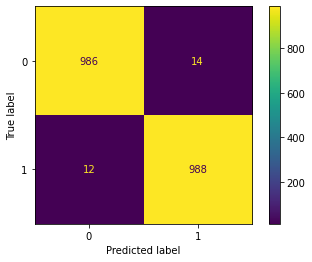

In [ ]:
# XGBoost classifier
from xgboost import XGBClassifier
t0 = time.clock()
model = XGBClassifier()
model.fit(features_xtrain, trainY)
t1= time.clock() - t0
print("XGBoost training time: ", t1)

#testing accuracy
t0 = time.clock()
pred_test_xg = model.predict(features_xtest)
t1= time.clock() - t0
print("XGBoost testing time :", t1)
print('Accuracy: ')
print(accuracy_score(testY, pred_test_xg)*100)
print('Confusion Matrix :')
print(confusion_matrix(testY, pred_test_xg))
print('Report : ')
print(classification_report(testY, pred_test_xg))

disp = ConfusionMatrixDisplay(confusion_matrix(testY, pred_test_xg))
disp.plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


RF training time: 29.061291999999412
RF testing time: 0.04967500000020664
Accuracy: 
98.65
Confusion Matrix :
[[976  24]
 [  3 997]]
Report : 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1000
           1       0.98      1.00      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()


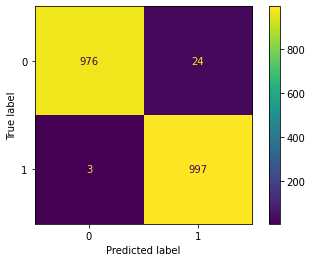

In [ ]:
#Random Forest Classifier

# Create the model with 100 trees
t0 = time.clock()
model_rf = RandomForestClassifier(n_estimators=100,
                               bootstrap = True,
                               max_features = 'sqrt')

model_rf.fit(features_xtrain, trainY)

t1= time.clock() - t0
print("RF training time:", t1)

t0 = time.clock()
pred_test_rf = model_rf.predict(features_xtest) #testing accuracy
t1= time.clock() - t0
print("RF testing time:", t1)

print('Accuracy: ')
print(accuracy_score(testY, pred_test_rf)*100)
print('Confusion Matrix :')
print(confusion_matrix(testY, pred_test_rf))
print('Report : ')
print(classification_report(testY, pred_test_rf))

disp = ConfusionMatrixDisplay(confusion_matrix(testY, pred_test_rf))
disp.plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


KNN training time:  0.00669700000071316
KNN testing time:  4.103754000000663
Accuracy: 
89.05
Confusion Matrix :
[[999   1]
 [218 782]]
Report : 
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1000
           1       1.00      0.78      0.88      1000

    accuracy                           0.89      2000
   macro avg       0.91      0.89      0.89      2000
weighted avg       0.91      0.89      0.89      2000



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':


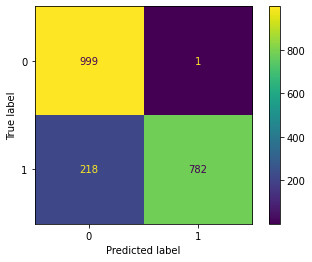

In [ ]:
# K nearest neighbours algorithm
#new

t0 =time.clock()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(features_xtrain, trainY)
t1= time.clock() -t0
print("KNN training time: ", t1)

t0 = time.clock()
pred_test = knn.predict(features_xtest) #testing accuracy
t1= time.clock() -t0
print("KNN testing time: ", t1)

print('Accuracy: ')
print(accuracy_score(testY, pred_test)*100)
print('Confusion Matrix :')
print(confusion_matrix(testY, pred_test))
print('Report : ')
print(classification_report(testY, pred_test))

disp = ConfusionMatrixDisplay(confusion_matrix(testY, pred_test))
disp.plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


Training Accuracy: 99.51
SVM classifier Training Time: 13.19654300000002


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()


Testing accuracy: 99.5
Svm Testing time: 0.3811200000000099


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Confusion Matrix :
[[994   6]
 [  4 996]]
Report : 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1000
           1       0.99      1.00      1.00      1000

    accuracy                           0.99      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      0.99      0.99      2000



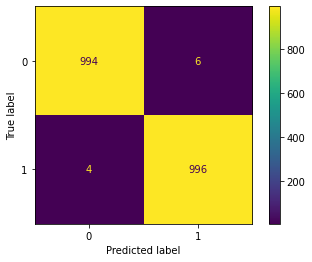

In [ ]:
 #SVM classifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score,confusion_matrix,classification_report, ConfusionMatrixDisplay

t0 = time.clock()
svm=SVC()
svm.fit(features_xtrain,trainY)

#training accuracy
acc_svm_train=round(svm.score(features_xtrain,trainY)*100,2)
print("Training Accuracy:",acc_svm_train)
t1= (time.clock() - t0)
print("SVM classifier Training Time:",t1)

#testing accuracy
t0 = time.clock()
acc_svm_test=round(svm.score(features_xtest,testY)*100,2)
print("Testing accuracy:",acc_svm_test)
t1= (time.clock() - t0)
print("Svm Testing time:",t1)

pred_test_xg = svm.predict(features_xtest)
print('Confusion Matrix :')
print(confusion_matrix(testY, pred_test_xg))
print('Report : ')
print(classification_report(testY, pred_test_xg))

disp = ConfusionMatrixDisplay(confusion_matrix(testY, pred_test_xg))
disp.plot()
plt.show()

In [ ]:
#importing the dataset from our google drive

#unzipping the dataset in a folder 'MyDrive'

!unzip /content/drive/MyDrive/fulltest.zip

Archive:  /content/drive/MyDrive/fulltest.zip
  inflating: fulltest/19001.jpg      
  inflating: fulltest/19001_1.jpg    
  inflating: fulltest/19002.jpg      
  inflating: fulltest/19002_1.jpg    
  inflating: fulltest/19003.jpg      
  inflating: fulltest/19003_1.jpg    
  inflating: fulltest/19004.jpg      
  inflating: fulltest/19004_1.jpg    
  inflating: fulltest/19005.jpg      
  inflating: fulltest/19005_1.jpg    
  inflating: fulltest/19006.jpg      
  inflating: fulltest/19006_1.jpg    
  inflating: fulltest/19007.jpg      
  inflating: fulltest/19007_1.jpg    
  inflating: fulltest/19008.jpg      
  inflating: fulltest/19008_1.jpg    
  inflating: fulltest/19009.jpg      
  inflating: fulltest/19009_1.jpg    
  inflating: fulltest/19010.jpg      
  inflating: fulltest/19010_1.jpg    
  inflating: fulltest/19011.jpg      
  inflating: fulltest/19011_1.jpg    
  inflating: fulltest/19012.jpg      
  inflating: fulltest/19012_1.jpg    
  inflating: fulltest/19013.jpg      
  in

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,
                                              zoom_range = 0.2,
                                            horizontal_flip = True,)

test_set = test_datagen.flow_from_directory('/content/',
                                            target_size = (224, 224),
                                            batch_size = 2000,
                                            classes = ['fulltest']

                                            )

Found 2000 images belonging to 1 classes.
